In [1]:
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#Define ticker
ticker = yf.Ticker('BTC-USD')

#Get historical price data
start_date = '2014-01-01'
end_date = '2024-01-01'
hist = ticker.history(start = start_date, end = end_date)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


Text(0.5, 1.0, 'BTC Price')

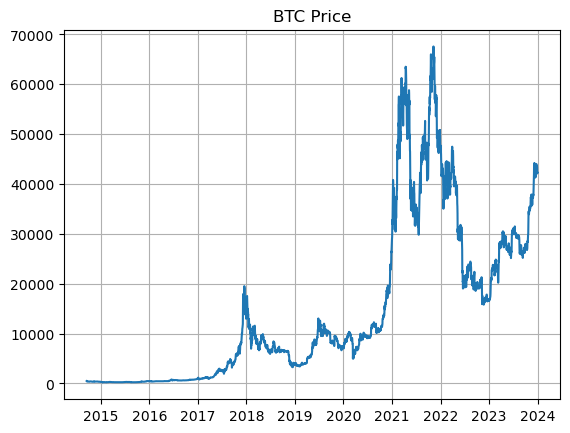

In [3]:
#Pulling only closing prices
Closing = hist[['Close']]

#Plotting Closing Price
plt.plot(hist['Close'])
plt.grid()
plt.title('BTC Price')

In [4]:
#Create day count, price and %change
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].to_list()
change = hist['Close'].pct_change().tolist()
change = change[1:] #Remove first term since its NAN

In [5]:
#Mean and standard deviation of %change
mean = np.mean(change)
std_dev = np.std(change)
print(std_dev, mean)

0.03697699032199405 0.002025158583202983


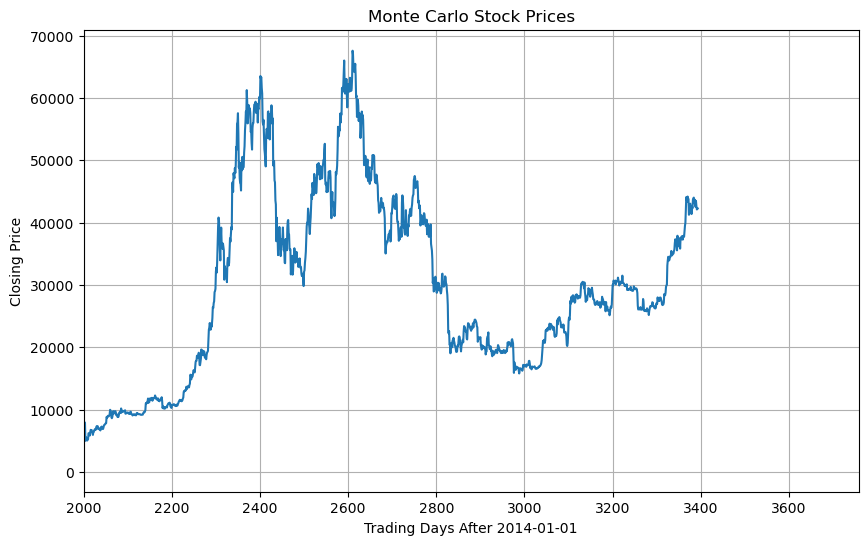

In [15]:
#Setting amount of simulations and prediction period
simulations = 200
days_to_sim = 365

#Setting up figure for simulation
fig = plt.figure(figsize = [10,6])
plt.plot(days, price_orig)
plt.title('Monte Carlo Stock Prices')
plt.xlabel('Trading Days After ' + start_date)
plt.ylabel('Closing Price')
plt.xlim([2000, len(days) + days_to_sim])
plt.grid()

#Initalize list for analysis
close_end = []
above_close = []
simulated_prices = []

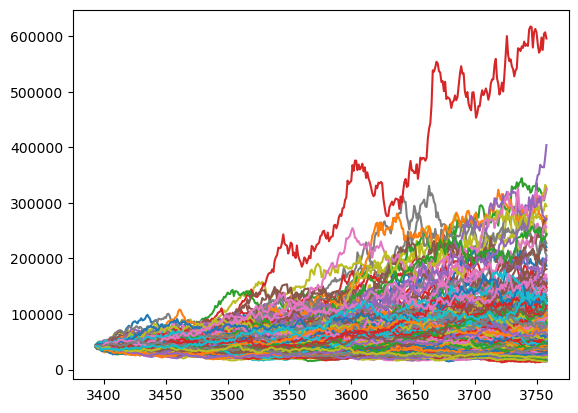

In [16]:
#For loop for number of simulations
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]
    
    #For loop for number of days to predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc = mean, scale = std_dev) #generate random %change from norm dist given mean and std.dev
        close_price.append(close_price[-1]*(1+perc_change))
        
    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)
        
    close_end.append(close_price[-1])
    simulated_prices.append(close_price) #Store simulated prices
    plt.plot(num_days, close_price)

In [8]:
#Avg closing price and prob. of increase after 1 year
avg_close_price = sum(close_end)/simulations
avg_perc_change = (avg_close_price - price_orig[-1])/price_orig[-1]
prob_of_inc = sum(above_close)/simulations

print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: $' + str(round(avg_close_price, 2)))
print('Predicted percent increase after 1 year: ' + 
      str(round(avg_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + 
      str(round(prob_of_inc*100, 2)) + '%')


Predicted closing price after 200 simulations: $84904.67
Predicted percent increase after 1 year: 100.89%
Probability of stock price increasing after 1 year: 75.0%


From our monte carlo simulations, the above shows what we can expect a year from now (01-01-2025) in terms of BTC price

Nothing is guaranteed, but this has been a great exploration for better understanding of what a Monte Carlo simulation entails